# 三次指数平滑法（holt-winters）

三次指数平滑就是Holt-Winters方法，不用说，它的提出肯定是和两个叫Holt和Winters的人有关了。

当一个序列在每个固定的时间间隔中都出现某种重复的模式，就称之具有季节性特征，而这样的一个时间间隔称为一个季节(理解：比如说在一个周内，销量呈现出重复的模式)。一个季节的长度k为它所包含的序列点个数。

二次指数平滑考虑了序列的baseline和趋势，三次就是在此基础上增加了一个季节分量。类似于趋势分量，对季节分量也要做指数平滑。比如预测下一个季节第3个点的季节分量时，需要指数平滑地考虑当前季节第3个点的季节分量、上个季节第3个点的季节分量...等等。

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# url = "../data/AirPassengers.csv" 如果把这个仓库下载后可以使用这个地址
# 如果后面有发现文件读不出来，可以自己手工把 .. 换成 https://raw.githubusercontent.com/liuhui998/time-series-little-book/master
# 但是这需要挂了 VPN, 因为课件还在开发过程中，大家多包涵
url = "../data/AirPassengers.csv"
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
# 因为周期为 12个月，test_num 就为12
test_num = 12 
train = data.iloc[0:-test_num,:]
print(train.shape)
test = data.iloc[-test_num:,:]
fcst_df = pd.DataFrame({
    'train': train['Passengers'],
    'test' : test['Passengers']
})
fcst_df.describe()

(132, 1)


,train,test
count,132.000000,12.000000
mean,262.492424,476.166667
std,106.625799,77.737125
min,104.000000,390.000000
25%,176.500000,418.500000
50%,239.500000,461.000000
75%,343.250000,514.750000
max,559.000000,622.000000


## 预测代码

* 指定季节性周期(seasonal_periods)是 12
* 指定 trend, seasonal 都是乘法 (mul)

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='mul', seasonal='mul',).fit()
fcst_value = fit1.forecast(len(test))


In [ ]:
* 从预测图形来看，预测结果是非常好的

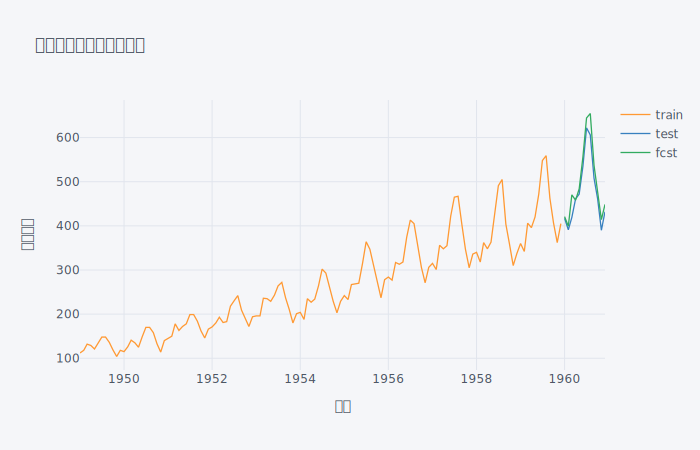

In [25]:
import cufflinks as cf

fcst_series = pd.Series(fcst_value,index = test.index)
fcst_df['fcst'] = fcst_series
new_fcst_fig = fcst_df.iplot(asFigure = True, xTitle="时间",yTitle="乘客数量", title="预测最近一年航空乘客数")
new_fcst_fig.show('svg')

## 计算预测准确性

### 计算 RMSE

In [20]:
diff = (fcst_df['test'] - fcst_df['fcst'])
square_diff_one = np.nanmean(np.square(diff))
rmse = np.sqrt(square_diff_one)
rmse

25.7648803882125

### 计算 MAPE

In [21]:
mape_diff = (fcst_df['test'] - fcst_df['fcst'])/fcst_df['test']
mape = np.nanmean(np.abs(mape_diff.values))*100
mape


4.318108555785838

### 结论

对于澳洲空乘数据集，holt-winters 目前是最好的，从 RMSE/MAPE可以看出，从图形中也可以看出

注意：不同算法对不同数据集的适用性不一样，大家要多尝试，然后灵活运用！

## 参考资料
* [7个时间序列预测方法 - 7 methods to perform Time Series forecasting](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)
* [时间序列分析之指数平滑法](https://zhuanlan.zhihu.com/p/43353740)
* [Holt-Winters -- Kibana5.4时间序列分析(一)
](http://vlambda.com/wz_wFFN2DvEJb.html)